In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from bokeh.plotting import figure, output_server, show

In [3]:
data = pd.read_csv('../data/train.csv')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data['DateTime'] = pd.to_datetime(data['Date'])

In [5]:
data['Year'] = data['DateTime'].apply(lambda x: x.year)
data['Month'] = data['DateTime'].apply(lambda x: x.month)
data['Day'] = data['DateTime'].apply(lambda x: x.day)
data['WeekNumber'] = data['DateTime'].apply(lambda x: x.isocalendar()[1])

In [6]:
data.dtypes

Store                     int64
DayOfWeek                 int64
Date                     object
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
DateTime         datetime64[ns]
Year                      int64
Month                     int64
Day                       int64
WeekNumber                int64
dtype: object

In [7]:
date_groups = data.groupby('WeekNumber')

Populating the interactive namespace from numpy and matplotlib


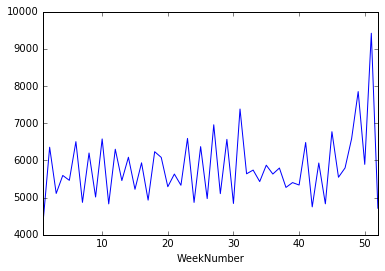

In [10]:
%pylab inline
date_groups['Sales'].mean().plot(kind="line")

Populating the interactive namespace from numpy and matplotlib


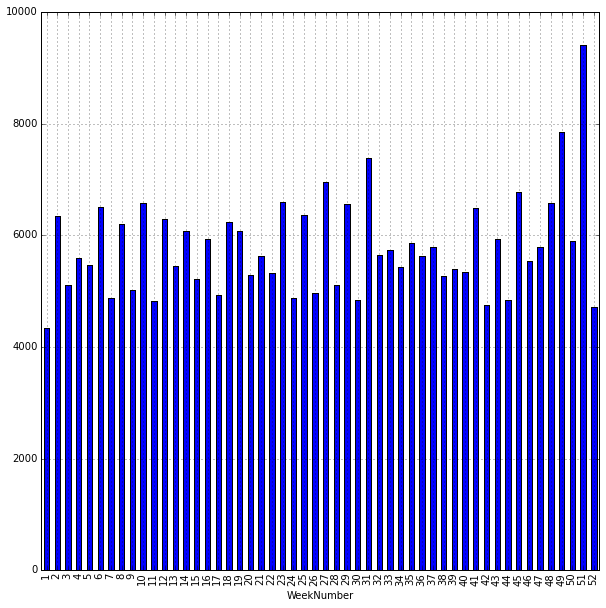

In [10]:
%pylab inline
date_groups['Sales'].mean().plot(figsize=(10,10), kind="bar")

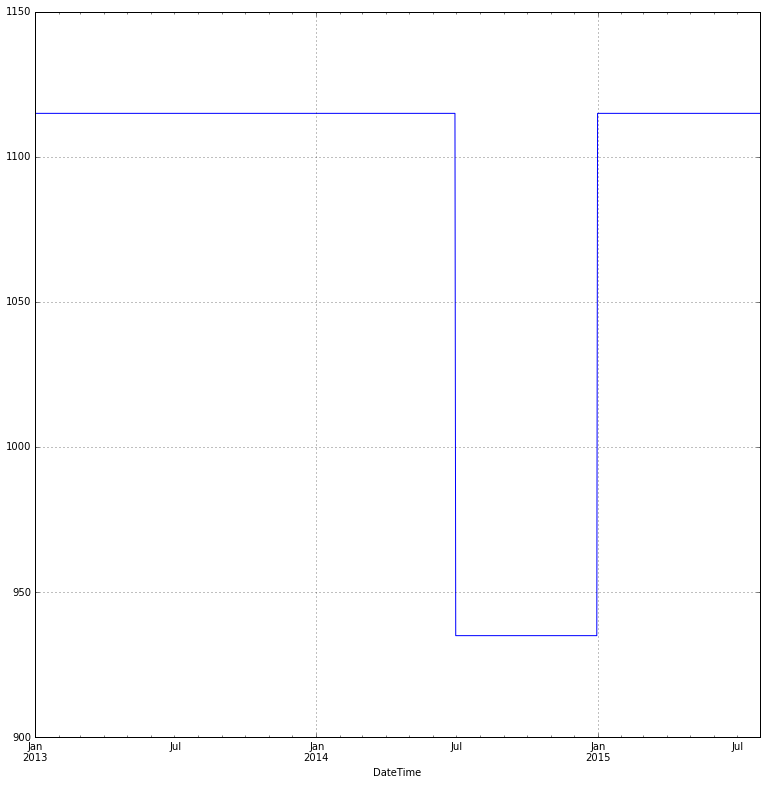

In [11]:
mask = (data['Open'] == 1)
grouped = data.groupby('DateTime')
grouped['Store'].count().plot(figsize=(13,13))

In [12]:
data[big_mask]['DateTime'].describe()

NameError: name 'big_mask' is not defined

In [17]:
data[big_mask]['Sales'].describe()

count    105836.000000
mean       6804.407054
std        3003.926185
min           0.000000
25%        4751.000000
50%        6260.000000
75%        8204.000000
max       33913.000000
Name: Sales, dtype: float64

In [20]:
data[data['Open'] == 0].describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekNumber
count,172817.000000,172817.000000,172817,172817,172817,172817.000000,172817.000000,172817.000000,172817.000000,172817.000000,172817.000000
mean,558.462987,6.333769,0,0,0,0.064716,0.105684,2013.834027,5.851768,15.053467,23.462645
std,322.771734,1.547688,0,0,0,0.246025,0.307434,0.778058,3.336661,9.252490,14.643610
min,1.000000,1.000000,0,0,0,0.000000,0.000000,2013.000000,1.000000,1.000000,1.000000
25%,279.000000,7.000000,0,0,0,0.000000,0.000000,2013.000000,3.000000,7.000000,12.000000
50%,560.000000,7.000000,0,0,0,0.000000,0.000000,2014.000000,5.000000,15.000000,21.000000
75%,839.000000,7.000000,0,0,0,0.000000,0.000000,2014.000000,8.000000,23.000000,35.000000
max,1115.000000,7.000000,0,0,0,1.000000,1.000000,2015.000000,12.000000,31.000000,52.000000


In [18]:
data.to_csv('postProcessed.csv', index=False)

In [25]:
datetime_groups = data.ix[data['Open']==1, :].groupby('DateTime')

dates = []
sales = []
for x, y in datetime_groups:
    dates.append(x)
    sales.append(y['Sales'].mean())

In [37]:
from bokeh.models import HoverTool, BoxSelectTool

output_server("line")

TOOLS = [HoverTool(), BoxSelectTool()]

p = figure(x_axis_type = "datetime", plot_width=1000, plot_height=400, tools=TOOLS)

p.line(dates, sales , line_width=2)

show(p)

Using saved session configuration for http://localhost:5006/
To override, pass 'load_from_config=False' to Session
